In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [2]:
titanic_train = pd.read_csv("train.csv")
titanic_test = pd.read_csv("test.csv")

In [3]:
titanic_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print('Train Info')
print("")
print(titanic_train.shape)
print("")
print(titanic_train.isna().sum())

Train Info

(891, 12)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
titanic_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print("Test Info")
print("")
print(titanic_test.shape)
print("")
print(titanic_test.isna().sum())

Test Info

(418, 11)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# Attempt 1 

In [7]:
titanic_train = titanic_train.drop('Cabin',axis=1)
titanic_test = titanic_test.drop('Cabin',axis=1)

In [8]:
titanic_train.Age.fillna(titanic_train.Age.mean(), inplace=True)
titanic_test.Age.fillna(titanic_test.Age.mean(), inplace=True)
titanic_train = titanic_train.dropna(subset=['Embarked'])
titanic_test.Fare.fillna(titanic_test.Fare.mean(), inplace=True)

print(titanic_train.isna().sum())
print("")
print(titanic_test.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [9]:
titanic_train.Survived.mean()

0.38245219347581555

In [10]:
train, val = train_test_split(titanic_train, test_size=0.2)

Pclass_train = pd.get_dummies(train.Pclass, drop_first=True)
Sex_train = pd.get_dummies(train.Sex, drop_first=True)

Pclass_val = pd.get_dummies(val.Pclass, drop_first=True)
Sex_val = pd.get_dummies(val.Sex, drop_first=True)

Pclass_test = pd.get_dummies(titanic_test.Pclass, drop_first=True)
Sex_test = pd.get_dummies(titanic_test.Sex, drop_first=True)

train_x = pd.concat((train[['Age','SibSp','Parch','Fare']], Pclass_train, Sex_train), axis=1)
train_y = train.Survived

val_x = pd.concat((val[['Age','SibSp','Parch','Fare']], Pclass_val, Sex_val), axis=1)
val_y = val.Survived

test = pd.concat((titanic_test[['Age','SibSp','Parch','Fare']], Pclass_test, Sex_test), axis=1)

scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
val_x = scaler.transform(val_x)
test = scaler.transform(test)

cv_score = cross_val_score(LogisticRegression(), train_x, train_y, scoring='precision', cv=10).mean()
print(cv_score)

0.7572593938535183


In [11]:
model = LogisticRegression().fit(train_x, train_y)
train_predictions = model.predict(train_x)
val_predictions = model.predict(val_x)
print('Training Precision', precision_score(train_predictions, train_y))
print('Training Accuracy', accuracy_score(train_predictions, train_y))
print("")
print('Validation Precision', precision_score(val_predictions, val_y))
print('Validation Accuracy', accuracy_score(val_predictions, val_y))

Training Precision 0.6653992395437263
Training Accuracy 0.8002812939521801

Validation Precision 0.7662337662337663
Validation Accuracy 0.8089887640449438


In [12]:
test_predictions = model.predict(test)
test_predictions = test_predictions.astype(int)

df_test = pd.read_csv("test.csv")
to_save = df_test[['PassengerId']].copy()
to_save.loc[:, 'Survived'] = test_predictions
to_save.to_csv('titanic_submission.csv', index=False)

# Attempt 2 (Testing Embarked Column)

In [13]:
titanic_train = pd.read_csv("train.csv")
titanic_test = pd.read_csv("test.csv")

In [14]:
titanic_train = titanic_train.drop('Cabin',axis=1)
titanic_test = titanic_test.drop('Cabin',axis=1)

titanic_train = titanic_train.drop('PassengerId',axis=1)
titanic_test = titanic_test.drop('PassengerId',axis=1)

titanic_train = titanic_train.drop('Name',axis=1)
titanic_test = titanic_test.drop('Name',axis=1)

titanic_train = titanic_train.drop('Ticket',axis=1)
titanic_test = titanic_test.drop('Ticket',axis=1)

In [15]:
titanic_train = titanic_train.dropna(subset=['Age'])
titanic_test.fillna(titanic_test.Age.mean(), inplace=True)

titanic_train = titanic_train.dropna(subset=['Embarked'])
titanic_test.Fare.fillna(titanic_test.Fare.mean(), inplace=True)

print(titanic_train.isna().sum())
print("")
print(titanic_test.isna().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [16]:
train, val = train_test_split(titanic_train, test_size=0.2)

Pclass_train = pd.get_dummies(train.Pclass, drop_first=True)
Sex_train = pd.get_dummies(train.Sex, drop_first=True)
Embarked_train = pd.get_dummies(train.Embarked, drop_first=True)

Pclass_val = pd.get_dummies(val.Pclass, drop_first=True)
Sex_val = pd.get_dummies(val.Sex, drop_first=True)
Embarked_val = pd.get_dummies(val.Embarked, drop_first=True)

Pclass_test = pd.get_dummies(titanic_test.Pclass, drop_first=True)
Sex_test = pd.get_dummies(titanic_test.Sex, drop_first=True)
Embarked_test = pd.get_dummies(titanic_test.Embarked, drop_first=True)

## With embarked

train_x_with_em = pd.concat((train[['Age','SibSp','Parch','Fare']], Pclass_train, Sex_train, Embarked_train), axis=1)
train_y_with_em = train.Survived

val_x_with_em = pd.concat((val[['Age','SibSp','Parch','Fare']], Pclass_val, Sex_val, Embarked_val), axis=1)
val_y_with_em = val.Survived

test_with_em = pd.concat((titanic_test[['Age','SibSp','Parch','Fare']], Pclass_test, Sex_test, Embarked_test), axis=1)

scaler = StandardScaler()
scaler.fit(train_x_with_em)
train_x_with_em = scaler.transform(train_x_with_em)
val_x_with_em = scaler.transform(val_x_with_em)
test_with_em = scaler.transform(test_with_em)

cv_scores = []
for i in range(10):
    cv_score = cross_val_score(LogisticRegression(), train_x_with_em, train_y_with_em, scoring='precision', cv=10).mean()
    cv_scores.append(cv_score)
print(np.mean(cv_scores))

0.7696091505113244


In [17]:
## Without embarked

train_x = pd.concat((train[['Age','SibSp','Parch','Fare']], Pclass_train, Sex_train), axis=1)
train_y = train.Survived

val_x = pd.concat((val[['Age','SibSp','Parch','Fare']], Pclass_val, Sex_val), axis=1)
val_y = val.Survived

test = pd.concat((titanic_test[['Age','SibSp','Parch','Fare']], Pclass_test, Sex_test), axis=1)

scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
val_x = scaler.transform(val_x)
test = scaler.transform(test)

cv_scores = []
for i in range(10):
    cv_score = cross_val_score(LogisticRegression(), train_x, train_y, scoring='precision', cv=10).mean()
    cv_scores.append(cv_score)
print(np.mean(cv_scores))

0.7765055755330355


In [18]:
## With embarked

model_with_em = LogisticRegression().fit(train_x_with_em, train_y_with_em)
train_predictions_with_em = model_with_em.predict(train_x_with_em)
val_predictions_with_em = model_with_em.predict(val_x_with_em)

print('Training Precision', precision_score(train_predictions_with_em, train_y_with_em))
print('Training Accuracy', accuracy_score(train_predictions_with_em, train_y_with_em))
print("")
print('Validation Precision', precision_score(val_predictions_with_em, val_y_with_em))
print('Validation Accuracy', accuracy_score(val_predictions_with_em, val_y_with_em))

Training Precision 0.7292576419213974
Training Accuracy 0.8101933216168717

Validation Precision 0.6440677966101694
Validation Accuracy 0.7972027972027972


In [19]:
test_predictions_with_em = model_with_em.predict(test_with_em)
test_predictions_with_em = test_predictions_with_em.astype(int)

df_test = pd.read_csv("test.csv")
to_save = df_test[['PassengerId']].copy()
to_save.loc[:, 'Survived'] = test_predictions_with_em
to_save.to_csv('titanic_submission.csv', index=False)

In [20]:
# Without embarked

model = LogisticRegression().fit(train_x, train_y)
train_predictions = model.predict(train_x)
val_predictions = model.predict(val_x)
print('Training Precision', precision_score(train_predictions, train_y))
print('Training Accuracy', accuracy_score(train_predictions, train_y))
print("")
print('Validation Precision', precision_score(val_predictions, val_y))
print('Validation Accuracy', accuracy_score(val_predictions, val_y))

Training Precision 0.7510917030567685
Training Accuracy 0.8189806678383128

Validation Precision 0.6610169491525424
Validation Accuracy 0.7902097902097902


In [21]:
test_predictions = model.predict(test)
test_predictions = test_predictions.astype(int)

df_test = pd.read_csv("test.csv")
to_save = df_test[['PassengerId']].copy()
to_save.loc[:, 'Survived'] = test_predictions
to_save.to_csv('titanic_submission.csv', index=False)

# Attempt 3 (Utilize L2 Penalty and GridSearchCV)

In [22]:
titanic_train = pd.read_csv("train.csv")
titanic_test = pd.read_csv("test.csv")

In [23]:
titanic_train = titanic_train.drop(columns = ['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1)
titanic_test = titanic_test.drop(columns = ['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1)

In [24]:
titanic_train = titanic_train.dropna(subset=['Age'])
titanic_test.fillna(titanic_test.Age.mean(), inplace=True)

titanic_train = titanic_train.dropna(subset=['Embarked'])
titanic_test.Fare.fillna(titanic_test.Fare.mean(), inplace=True)

print(titanic_train.isna().sum())
print("")
print(titanic_test.isna().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [25]:
train, val = train_test_split(titanic_train, test_size=0.2)

features = list(titanic_test.columns)

Pclass_train = pd.get_dummies(train.Pclass, drop_first=True)
Sex_train = pd.get_dummies(train.Sex, drop_first=True)
Embarked_train = pd.get_dummies(train.Embarked, drop_first=True)
train_x = pd.concat((train[['Age','SibSp','Parch','Fare']], Pclass_train, Sex_train, Embarked_train),axis=1)
train_y = train.Survived
scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)

Pclass_val = pd.get_dummies(val.Pclass, drop_first=True)
Sex_val = pd.get_dummies(val.Sex, drop_first=True)
Embarked_val = pd.get_dummies(val.Embarked, drop_first=True)
val_x = pd.concat((val[['Age','SibSp','Parch','Fare']], Pclass_val, Sex_val, Embarked_val), axis=1)
val_y = val.Survived
val_x = scaler.transform(val_x)

Pclass_test = pd.get_dummies(titanic_test.Pclass, drop_first=True)
Sex_test = pd.get_dummies(titanic_test.Sex, drop_first=True)
Embarked_test = pd.get_dummies(titanic_test.Embarked, drop_first=True)
test = pd.concat((titanic_test[['Age','SibSp','Parch','Fare']], Pclass_test, Sex_test, Embarked_test), axis=1)
test = scaler.transform(test)

In [26]:
grid = {"C":np.logspace(-5,5,22,base=10),"penalty":['l2']}
model = LogisticRegression()
model_cv = GridSearchCV(model,grid,cv=10)
model_cv.fit(train_x,train_y)

print(model_cv.best_params_)
print(model_cv.best_score_)

{'C': 0.5779692884153314, 'penalty': 'l2'}
0.7908834586466166


In [27]:
accuracy_score(val_y,model_cv.predict(val_x))

0.8251748251748252

In [28]:
test_predictions = model_cv.predict(test)
test_predictions = test_predictions.astype(int)

df_test = pd.read_csv("test.csv")
to_save = df_test[['PassengerId']].copy()
to_save.loc[:, 'Survived'] = test_predictions
to_save.to_csv('titanic_submission.csv', index=False)

# Attempt 4 (Utilize L2 Penalty and GridSearchCV, without Splitting Training)

In [29]:
titanic_train = pd.read_csv("train.csv")
titanic_test = pd.read_csv("test.csv")

In [30]:
titanic_train = titanic_train.drop(columns = ['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1)
titanic_test = titanic_test.drop(columns = ['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1)

In [31]:
titanic_train = titanic_train.dropna(subset=['Age'])
titanic_test.fillna(titanic_test.Age.mean(), inplace=True)

titanic_train = titanic_train.dropna(subset=['Embarked'])
titanic_test.Fare.fillna(titanic_test.Fare.mean(), inplace=True)

print(titanic_train.isna().sum())
print("")
print(titanic_test.isna().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [32]:
Pclass_train = pd.get_dummies(titanic_train.Pclass, drop_first=True)
Sex_train = pd.get_dummies(titanic_train.Sex, drop_first=True)
Embarked_train = pd.get_dummies(titanic_train.Embarked, drop_first=True)
train_x = pd.concat((titanic_train[['Age','SibSp','Parch','Fare']], Pclass_train, Sex_train, Embarked_train),axis=1)
train_y = titanic_train.Survived
scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)

Pclass_test = pd.get_dummies(titanic_test.Pclass, drop_first=True)
Sex_test = pd.get_dummies(titanic_test.Sex, drop_first=True)
Embarked_test = pd.get_dummies(titanic_test.Embarked, drop_first=True)
test = pd.concat((titanic_test[['Age','SibSp','Parch','Fare']], Pclass_test, Sex_test, Embarked_test), axis=1)
test = scaler.transform(test)

In [33]:
grid = {'C':np.logspace(-5,5,11,base=10),'penalty':['l2']}
model = LogisticRegression()
model_cv = GridSearchCV(model,grid,cv=10)
model_cv.fit(train_x,train_y)

print(model_cv.best_params_)
print(model_cv.best_score_)

{'C': 0.1, 'penalty': 'l2'}
0.7936424100156494


In [34]:
test_predictions = model_cv.predict(test)
test_predictions = test_predictions.astype(int)

df_test = pd.read_csv("test.csv")
to_save = df_test[['PassengerId']].copy()
to_save.loc[:, 'Survived'] = test_predictions
to_save.to_csv('titanic_submission.csv', index=False)

# Attempt 5 (Manually Find Best Regularization Penalty)

In [35]:
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')

In [36]:
titanic_train = titanic_train.drop(columns = ['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1)
titanic_test = titanic_test.drop(columns = ['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1)

In [37]:
titanic_train = titanic_train.dropna(subset=['Age'])
titanic_test.fillna(titanic_test.Age.mean(), inplace=True)

titanic_train = titanic_train.dropna(subset=['Embarked'])
titanic_test.Fare.fillna(titanic_test.Fare.mean(), inplace=True)

print(titanic_train.isna().sum())
print("")
print(titanic_test.isna().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [38]:
train, val = train_test_split(titanic_train,test_size=0.2)

Pclass_train = pd.get_dummies(train.Pclass, drop_first=True)
Sex_train = pd.get_dummies(train.Sex, drop_first=True)
Embarked_train = pd.get_dummies(train.Embarked, drop_first=True)
train_x = pd.concat((train[['Age','SibSp','Parch','Fare']],Pclass_train,Sex_train,Embarked_train),axis=1)
train_y = train.Survived
scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)

Pclass_val = pd.get_dummies(val.Pclass, drop_first=True)
Sex_val = pd.get_dummies(val.Sex, drop_first=True)
Embarked_val = pd.get_dummies(val.Embarked, drop_first=True)
val_x = pd.concat((val[['Age','SibSp','Parch','Fare']],Pclass_val,Sex_val,Embarked_val),axis=1)
val_y = val.Survived
val_x = scaler.transform(val_x)

Pclass_test = pd.get_dummies(titanic_test.Pclass, drop_first=True)
Sex_test = pd.get_dummies(titanic_test.Sex, drop_first=True)
Embarked_test = pd.get_dummies(titanic_test.Embarked, drop_first=True)
test = pd.concat((titanic_test[['Age','SibSp','Parch','Fare']], Pclass_test, Sex_test, Embarked_test), axis=1)
test = scaler.transform(test)

In [39]:
data = []
for reg_coef in np.logspace(-5,5,10,base=10):
    model = LogisticRegression(C = 1/reg_coef)
    model.fit(train_x,train_y)
    train_acc = accuracy_score(model.predict(train_x),train_y)
    val_acc = accuracy_score(model.predict(val_x),val_y)
    data.append({
        'model': model,
        'reg_coef': reg_coef,
        'train_accuracy': train_acc,
        'validation_accuracy': val_acc
    })
    
models = pd.DataFrame(data)

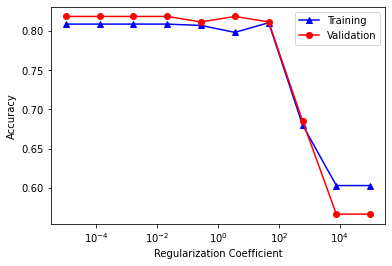

In [40]:
_ = plt.plot(models.reg_coef,models.train_accuracy,'b-^',label='Training',)
_ = plt.plot(models.reg_coef,models.validation_accuracy,'r-o',label='Validation')
_ = plt.legend()
_ = plt.xscale('log')
_ = plt.xlabel('Regularization Coefficient')
_ = plt.ylabel('Accuracy')
plt.show()

In [41]:
best_model_index = models.validation_accuracy.idxmax()
best_model_row = models.iloc[best_model_index]
best_model = best_model_row.model

test_predictions = best_model.predict(test)
test_predictions = test_predictions.astype(int)

df_test = pd.read_csv("test.csv")
to_save = df_test[['PassengerId']].copy()
to_save.loc[:, 'Survived'] = test_predictions
to_save.to_csv('titanic_submission.csv', index=False)

# Attempt 6 (With Decision Tree)

In [42]:
titanic_train = pd.read_csv("train.csv")
titanic_test = pd.read_csv("test.csv")

In [43]:
titanic_train = titanic_train.drop(columns = ['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1)
titanic_test = titanic_test.drop(columns = ['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1)

In [44]:
titanic_train = titanic_train.dropna(subset=['Age'])
titanic_test.fillna(titanic_test.Age.mean(), inplace=True)

titanic_train = titanic_train.dropna(subset=['Embarked'])
titanic_test.Fare.fillna(titanic_test.Fare.mean(), inplace=True)

print(titanic_train.isna().sum())
print("")
print(titanic_test.isna().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [45]:
Pclass_train = pd.get_dummies(titanic_train.Pclass, drop_first=True)
Sex_train = pd.get_dummies(titanic_train.Sex, drop_first=True)
Embarked_train = pd.get_dummies(titanic_train.Embarked, drop_first=True)
train_x = pd.concat((titanic_train[['Age','SibSp','Parch','Fare']], Pclass_train, Sex_train, Embarked_train),axis=1)
train_y = titanic_train.Survived

Pclass_test = pd.get_dummies(titanic_test.Pclass, drop_first=True)
Sex_test = pd.get_dummies(titanic_test.Sex, drop_first=True)
Embarked_test = pd.get_dummies(titanic_test.Embarked, drop_first=True)
test = pd.concat((titanic_test[['Age','SibSp','Parch','Fare']], Pclass_test, Sex_test, Embarked_test), axis=1)

In [46]:
hyperparameters = {'min_samples_leaf': [1,10,50,100,200,300],
                   'max_depth': [1,5,10,15,20,25,30,35,40]}
model = DecisionTreeClassifier()
model_cv = GridSearchCV(model,hyperparameters,cv=10)
model_cv.fit(train_x,train_y)
print(model_cv.best_params_)
print(model_cv.best_score_)

{'max_depth': 5, 'min_samples_leaf': 1}
0.8104264475743349


In [47]:
test_predictions = model_cv.predict(test)
test_predictions = test_predictions.astype(int)

df_test = pd.read_csv("test.csv")
to_save = df_test[['PassengerId']].copy()
to_save.loc[:, 'Survived'] = test_predictions
to_save.to_csv('titanic_submission.csv', index=False)